# BENVGSA6: Data Science for Spatial Systems

### Assignment

Yuki Nishimura  (MSc Business Analytics)  #160447987

April 25, 2017

## Abstract

This report conducts a data analysis on rental cycling in London to identify trends and insight. London cycling system is the rental service, which was started in 2010 by Transport for London, a local governmental organization. After starting this system, the more number of Londoners enjoyed cycling. According to the report published Transport for London (https://www.london.gov.uk/sites/default/files/cycling-revolution-london.pdf), the number of cyclists on the main roads increases more than double. London government encourages people to use bicycles as one of the main measures for transportation. This potential transportation measure can enable to reduce the traffic jam, the extreme congestion in the subway, and also increase individuals’ health condition as cycling can be moderate exercises. Latest research on rental cycling is of critical interest for Transport for London so they can capture this campaign’s tendency and user behaviours. This report uses rental one year cycling data from 10 January to 27 December 2016, published by Transport for London. The data are collected bicycle stations all over London. 

## Cycling system in London 

As of now, more than11500 bikes are available in around 350 docking stations every 300 to 500 meters in London. There are two pricing systems, daily and yearly membership. In the case of daily systems, it costs 2 pounds to rent a bike for 24 hours, and the first 30 minutes of each use is free. After the first 30 minutes, it costs 2 pounds for each 30 minutes. This means that when people return the bike to any stations within 30 minutes, it costs free. Only debit or credit card is available for paying. *(retrieved from https://tfl.gov.uk/modes/cycling/santander-cycles)*  

## Preparation

* ** Data **  
Data was downloaded from Transfer for London website (http://cycling.data.tfl.gov.uk/). I downloaded dataset (39 csv files) for 2016 cycling data in “usage-stats/” folder. To read the data in this notebook, I saved these 39 csv files in the directory where is the same folder as this notebook is located. In order to reproduce the data analysis with the following code, the directory should not have other csv files, but have only these 39 csv files.  
    *** Note: *** A file “21JourneyDataExtract31Aug2016-06Sep2016.csv" does not have the same columns as the other files, specifically it does not include two columns “EndStation Id” and and “StartStation Id” and include other uninformative columns. Fortunately, these station Id is available when I used excel function “vlookup”, so I modified this file before running the code.


* ** Libraries **   
This report uses several python libraries. If they have not been installed, it is necessary to install them first. To install, please type the command “pip3 install [name of the library]” into command or terminal. If the python version is 2, please tipe “pip install [name of the library]”.

## Outline

#### 1. Data Validation and Cleaning   

#### 2. Comprehensive Analysis 
        
#### 3. Lmitation and Suggestions

#### 4. Conclusions

In [13]:
import requests
import pandas as pd
import numpy as np
import os
import glob
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
import folium # library for mapping

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
#plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# 1. Data validation and clearning

It takes around 25 seconds to read all dataset. In the code below, it reads all csv files that are save in the path folder.

### Import data

It takes around 26 seconds to read all dataset. In the code below, it reads all csv files that are save in the path folder.

In [16]:
path = os.curdir # directory path

# Identify the columns that read as df 
# Since the original data has something empty columns, I needed to identify the name of the columns here, although I read all columns.
columns = ["Rental Id", "Duration", "Bike Id", "End Date", "EndStation Id", "EndStation Name", "Start Date", "StartStation Id", "StartStation Name"]
all_files = glob.glob(path + "/*.csv")
%time df = pd.concat((pd.read_csv(f, usecols=columns) for f in all_files), ignore_index=True)

CPU times: user 23.3 s, sys: 2.91 s, total: 26.2 s
Wall time: 27 s


In [17]:
df.tail()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
10128195,55854577,540.0000,"3,701.0000",13/07/2016 00:08,9.0000,"New Globe Walk, Bankside",12/07/2016 23:59,334,"Concert Hall Approach 1, South Bank"
10128196,55854576,"4,260.0000","12,562.0000",13/07/2016 01:10,132.0000,"Bethnal Green Road, Shoreditch",12/07/2016 23:59,132,"Bethnal Green Road, Shoreditch"
10128197,55854574,"4,260.0000","8,201.0000",13/07/2016 01:10,132.0000,"Bethnal Green Road, Shoreditch",12/07/2016 23:59,132,"Bethnal Green Road, Shoreditch"
10128198,55854573,"4,260.0000","9,343.0000",13/07/2016 01:10,132.0000,"Bethnal Green Road, Shoreditch",12/07/2016 23:59,132,"Bethnal Green Road, Shoreditch"
10128199,55854572,780.0000,"1,230.0000",13/07/2016 00:12,625.0000,"Queen's Circus, Battersea Park",12/07/2016 23:59,218,"St. Luke's Church, Chelsea"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128200 entries, 0 to 10128199
Data columns (total 9 columns):
Rental Id            int64
Duration             float64
Bike Id              float64
End Date             object
EndStation Id        float64
EndStation Name      object
Start Date           object
StartStation Id      int64
StartStation Name    object
dtypes: float64(3), int64(2), object(4)
memory usage: 695.4+ MB


In [19]:
df.describe()

,Rental Id,Duration,Bike Id,EndStation Id,StartStation Id
count,"10,128,200.0000","10,025,459.0000","10,128,199.0000","10,024,788.0000","10,128,200.0000"
mean,"56,051,403.8831","1,265.8821","7,467.0798",349.8985,353.0030
std,"3,054,438.9370","6,701.0627","4,209.5126",231.1713,231.3964
min,"50,754,225.0000","-3,540.0000",1.0000,1.0000,1.0000
25%,"53,407,667.7500",480.0000,"3,822.0000",154.0000,157.0000
50%,"56,050,683.5000",840.0000,"7,581.0000",312.0000,318.0000
75%,"58,697,526.2500","1,320.0000","11,130.0000",541.0000,545.0000
max,"61,343,320.0000","2,674,020.0000","14,841.0000",820.0000,820.0000


From above, It is seen that rental bicycles were used ten million times (101,128,200 times) in 2016.  I can also observe that except for duation, the other columns are not so meaningful for analysis as they are id number. In this analysis, Date data (*End Date* and *Start Date*), Station data (*Station Id* and *Station Name*), and *Duration* will be used. Finally, the suspecious thing is that the minimum duration is the negative. In the following section, I will manipulate Date data, Station data, and Duration as investigating the negative value.

### Data Clearning

In this section, I will do (1) remove null data, (2) change the data type of *Start Date* and *End Date* into datetime sype, and (3) inspect the negative value of *Duration*.

### (1) Drop Na

In [20]:
df = df.dropna()
df.describe()

,Rental Id,Duration,Bike Id,EndStation Id,StartStation Id
count,"10,024,788.0000","10,024,788.0000","10,024,788.0000","10,024,788.0000","10,024,788.0000"
mean,"56,043,731.1702","1,265.8906","7,469.0586",349.8985,352.8175
std,"3,058,787.5737","6,701.2310","4,209.5069",231.1713,231.3679
min,"50,754,225.0000","-3,540.0000",1.0000,1.0000,1.0000
25%,"53,390,888.7500",480.0000,"3,824.0000",154.0000,156.0000
50%,"56,041,748.5000",840.0000,"7,585.0000",312.0000,318.0000
75%,"58,696,080.2500","1,320.0000","11,133.0000",541.0000,544.0000
max,"61,343,320.0000","2,674,020.0000","14,841.0000",820.0000,820.0000


After removing the incomplete data, I attained 10,024,788 data. I will use this dataset for this analysis. To make the index number consective, I will renumber the index below.

In [21]:
# Renumbering Index
df.index = range(len(df))

In [22]:
print("Number of Start Station Id: ", len(df['StartStation Id'].value_counts()))
print("Number of Start Station Name: ", len(df['StartStation Name'].value_counts()))
print("Number of End Station Id: ", len(df['EndStation Id'].value_counts()))
print("Number of End Station Name: ", len(df['EndStation Name'].value_counts()))

Number of Start Station Id:  791
Number of Start Station Name:  805
Number of End Station Id:  791
Number of End Station Name:  805


### (2) Timedata
The code below is for converting *object* data type to *datetime* data type according to *Start Date* and *End Date*. It takes a few minutes.

In [23]:
# Convert Start Date and End Date into datetime format.
df['Start Date'] = pd.to_datetime(df['Start Date'], format="%d/%m/%Y %H:%M")
df['End Date'] = pd.to_datetime(df['End Date'], format="%d/%m/%Y %H:%M")
df.dtypes

Rental Id                     int64
Duration                    float64
Bike Id                     float64
End Date             datetime64[ns]
EndStation Id               float64
EndStation Name              object
Start Date           datetime64[ns]
StartStation Id               int64
StartStation Name            object
dtype: object

### (3) Check Duration
Since *Duration* denotes how long a user hired a bicycle, it does not really make sense that several *Duration* values are negative. In the following, the nevative values are inspectated. First, I will choose the dataset of which *Duration* is negative, and compared with the gap between *Start Date* and *End Date*.

In [24]:
# Select the data of which Duration is negative.
n_duration =df[df['Duration']<0]

In [25]:
n_duration

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
6024301,59897994,"-2,040.0000","9,245.0000",2016-10-30 01:01:00,583.0000,"Abingdon Green, Westminster",2016-10-30 01:35:00,693,"Felsham Road, Putney"
6036575,59898131,"-1,560.0000","13,359.0000",2016-10-30 01:27:00,40.0000,"Commercial Street, Shoreditch",2016-10-30 01:53:00,783,"Monier Road, Hackney Wick"
6037029,59898117,"-2,340.0000","10,275.0000",2016-10-30 01:11:00,658.0000,"Ethelburga Estate, Battersea Park",2016-10-30 01:50:00,616,"Aintree Street, Fulham"
6037448,59898140,"-3,060.0000","7,059.0000",2016-10-30 01:04:00,696.0000,"Charing Cross Hospital, Hammersmith",2016-10-30 01:55:00,613,"Woodstock Grove, Shepherd's Bush"
6043749,59897981,"-1,740.0000","5,690.0000",2016-10-30 01:04:00,235.0000,"Kennington Road , Vauxhall",2016-10-30 01:33:00,263,"St. Mary Axe, Aldgate"
6048617,59898025,"-1,680.0000","13,133.0000",2016-10-30 01:10:00,65.0000,"Gower Place , Euston",2016-10-30 01:38:00,270,"Kennington Lane Rail Bridge, Vauxhall"
6053921,59898134,"-2,520.0000","11,957.0000",2016-10-30 01:11:00,471.0000,"Hewison Street, Old Ford",2016-10-30 01:53:00,122,"Norton Folgate, Liverpool Street"
6059787,59898155,"-2,640.0000","4,303.0000",2016-10-30 01:13:00,381.0000,"Charlotte Street, Fitzrovia",2016-10-30 01:57:00,574,"Eagle Wharf Road, Hoxton"
6061765,59898104,"-2,340.0000",852.0000,2016-10-30 01:07:00,658.0000,"Ethelburga Estate, Battersea Park",2016-10-30 01:46:00,341,"Craven Street, Strand"
6070305,59898147,"-2,520.0000","2,535.0000",2016-10-30 01:15:00,117.0000,"Lollard Street, Vauxhall",2016-10-30 01:57:00,378,"Natural History Museum, South Kensington"


Looking at the data in *End Date* and *Start Date*, they are probably opposite, as Start Date should be ealier than End Date. If values in these columns are simply opposite, I can just replace positive values of current negative values by using abs() function. To make sure wether I can take this measure, I will calculate the gap between Start Date and End Date and compare with the Duration.

In [26]:
original = n_duration['Duration']
original_min = n_duration['Duration']/60
start_end = n_duration['Start Date']-n_duration['End Date']

In [27]:
comparison = pd.concat([original, original_min, start_end], axis = 1)
comparison.columns = ['original', 'original_min.', 'start-end']
comparison

,original,original_min.,start-end
6024301,"-2,040.0000",-34.0000,00:34:00
6036575,"-1,560.0000",-26.0000,00:26:00
6037029,"-2,340.0000",-39.0000,00:39:00
6037448,"-3,060.0000",-51.0000,00:51:00
6043749,"-1,740.0000",-29.0000,00:29:00
6048617,"-1,680.0000",-28.0000,00:28:00
6053921,"-2,520.0000",-42.0000,00:42:00
6059787,"-2,640.0000",-44.0000,00:44:00
6061765,"-2,340.0000",-39.0000,00:39:00
6070305,"-2,520.0000",-42.0000,00:42:00


The above tables shows the original Duration value by second, the original Duration valye by minutes, and the gap between Start Date and End Date. From this table, the original Duration by miniutes and the value by Start Date - End Date are the same. Hence, it is arguably obvious that the original Duration value should be replace positive. I will replace the original Duration with the positive value.

In [28]:
df['Duration'] = abs(df['Duration'])

In [29]:
df.Duration.describe()

count                            10,024,788.0000
mean                                  1,265.9338
std                                   6,701.2228
min                                       0.0000
25%                                     480.0000
50%                                     840.0000
75%                                   1,320.0000
max                               2,674,020.0000
Name: Duration, dtype: float64

Now all data in Duration are positive.

# 2. Comprehensive Analysis
This section analyses the data from three aspects, (1) Time  (2) Duration, and (3) Bike station.
Through this parts, I tried to grasp the features of London cyclists and exploring the answer to the following questions.  
    - Are there any tendencies about hiring sycle by time, day, and season?  When people tend to rent a bike?
    - Are there any tendencies about duration by time, day and season?
    - Where is the popular route to move by bike?
    - Where is the popular station?　　
Pre-processing will be conducted as necessary through the process.

## (1) When people tend to rent a bike?

It will be revealed that what time factors are related to the number of hiring.

### HOUR

In [30]:
df['S_hour'] = pd.DatetimeIndex(df['Start Date']).hour

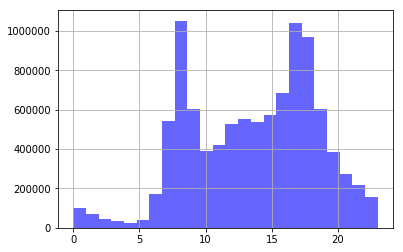

In [31]:
df['S_hour'].hist(bins=24, color = "b", alpha = 0.6);

Obviously bicycles are used most in 8 to 10 in the morning and 16 to 18 in the evening. In other words, a lot of rental bicycles are used for commuting.

### DAY

In [32]:
count = df.groupby(['Start Date']).count()
n_of_hiring = pd.DataFrame(count['Rental Id'])
n_of_hiring.columns = ['count']

count_hour = pd.DataFrame(n_of_hiring['count'].resample('60T').sum())
count_day = pd.DataFrame(n_of_hiring['count'].resample('D').sum())

In [33]:
day = []
for i in range(len(count_day)):
    temp_day = count_day.index[i].weekday()
    day.append(temp_day)
count_day['day'] = day

In [34]:
day = []
for i in range(len(count_hour)):
    temp_day = count_hour.index[i].weekday()
    day.append(temp_day)
count_hour['day'] = day

In [35]:
week = count_day.groupby(['day']).sum()

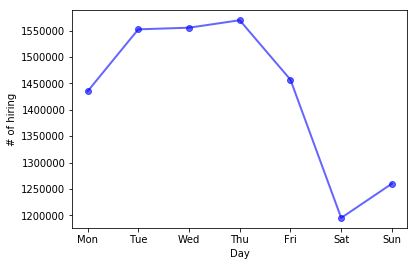

In [36]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(week, 'o-', linewidth=2, color = 'b', alpha=0.6)
plt.xticks(range(7), days)
plt.xlabel('Day')
plt.ylabel('# of hiring')
plt.show()

Rental bicycles are used more in weekdays than weekends. This results also supports the interpretation mentioned in previous *by hour* analysis - bicycles are mainly used for commuting.  
Now I am wondering the difference by the combination of Hour and Day, so this will be explored next. 

### HOUR $ \times $ DAY

In [37]:
weekend = count_hour[(count_hour.day ==5) | (count_hour.day == 6)]
weekday = count_hour[(count_hour.day !=5) & (count_hour.day != 6)]

In [38]:
weekend['S_hour'] = pd.DatetimeIndex(weekend.index).hour
weekday['S_hour'] = pd.DatetimeIndex(weekday.index).hour
hour_weekend = weekend.groupby('S_hour').sum()
hour_weekday = weekday.groupby('S_hour').sum()

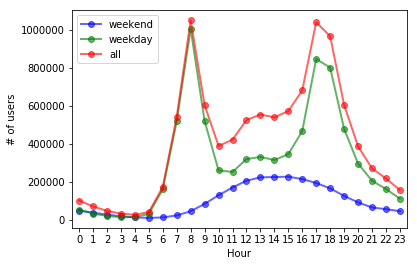

In [39]:
plt.subplot()
plot1 = plt.plot(hour_weekend['count'], 'o-', linewidth=2, color = 'b', alpha=0.6, label="weekend")
plot2 = plt.plot(hour_weekday['count'], 'o-', linewidth=2, color = 'g', alpha=0.6, label="weekday")
plot3 = plt.plot(df['S_hour'].value_counts().sort_index(), 'o-', linewidth=2, color = 'r', alpha=0.6, label="all")

plt.legend(loc='best')
plt.xlim(-0.5, 23.5)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('# of users')
plt.show()

The tendency is pretty different in Weekday and Weekend. In Weekday, it is obvious that the commuting time corresponds to the increase of hiring of bicycle, while in weekend, 11 to 18 is the most rented time.

### SEASON
So far, this report has revealed that time (the hour) and day is pretty related the number of hiring. This part will explore the tendency from the macro perspective - seasonarity.

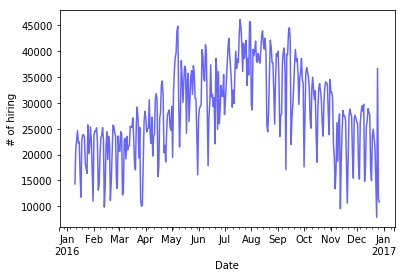

In [40]:
count_day['count'].plot(color = 'b', alpha=0.6)
plt.xlabel('Date')
plt.ylabel("# of hiring");

Rental cycling is more popular during summer, specifically from July to September. According to this analysis (https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/) about Seattle cycling, the number of bike riders and hours of daylight are correlated. To confirm this is the case in London cycling as well, I will compare the number of hiring and hours of daylight. To analyse a relation between calculate hours of daylight and the number of cycling, I refered to the Seattle cycling analysis and the documantation (http://imsc.pacificclimate.org/proceedings/11IMSCppt/Craigmile_session10.pdf, p.10).

**- Hours of Dailight -**

In [41]:
#count_hour = count_hour[['count']].fillna(0.0).astype(int)

In [42]:
# This code was retreived from (https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)

# Define a function which returns the hours of daylight
# given the day of the year, from 0 to 365

def hours_of_daylight(date, axis=23.44, latitude=51.50):     # Earth's axis is tilted 23.4 degrees, Latitude of London is 51.50
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

count_day['daylight'] = list(map(hours_of_daylight, count_day.index))

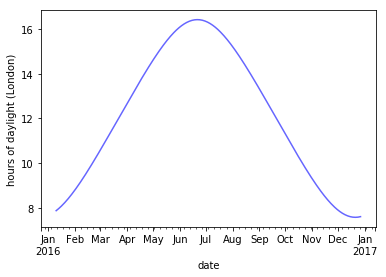

In [43]:
# Plot the daylight
count_day['daylight'].plot(color='b', alpha=0.6)
plt.ylabel('hours of daylight (London)')
plt.xlabel('date');

In general, the summer solstice is 21 of Jun, and the winter solstice is 21 of December. The above graph corresponds to this fact.

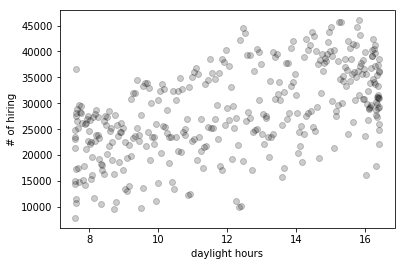

In [44]:
plt.scatter(count_day['daylight'], count_day['count'], color='black', alpha=0.2, label='Real')
plt.xlabel('daylight hours')
plt.ylabel('# of hiring');

As the previous analysis investigated, I can see that daylight hours are linearly correlated to the number of rental Londoner cyclists as well. The linear fitting line will be computed below.

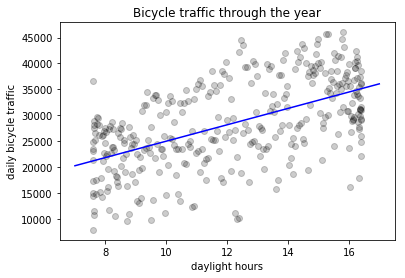

In [45]:
from sklearn.linear_model import LinearRegression

X = count_day[['daylight']].to_dense()
y = count_day['count']
clf = LinearRegression(fit_intercept=True).fit(X, y)

count_day['daylight_trend'] = clf.predict(X)
count_day['daylight_corrected_total'] = count_day['count'] - count_day['daylight_trend'] + count_day['daylight_trend'].mean()

xfit = np.linspace(7, 17)
yfit = clf.predict(xfit[:, None])
plt.scatter(count_day['daylight'], count_day['count'], color='black', alpha=0.2, label='Real')
plt.plot(xfit, yfit, '-k', color='blue')
plt.title("Bicycle traffic through the year")
plt.xlabel('daylight hours')
plt.ylabel('daily bicycle traffic');

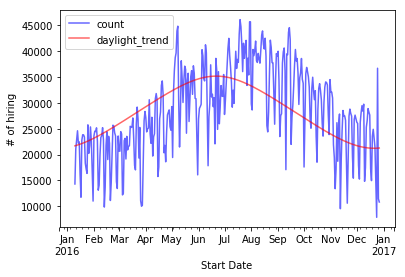

In [46]:
count_day[['count', 'daylight_trend']].plot(color = ['b', 'r'], alpha=0.6)
plt.ylabel("# of hiring");

Above graph shows the relation between the dayligt hours and the number of hiring. They are not completely related as the peak of hte hiring is during the end of July or the beggining of July, although the trend of the number of hired cycling and daylight are similar.  
From this observation, it can be said that the hours of daylight is probably not the most powerful factor. Perhaps, there is the other stronger factor that makes cycling popular. I infer that the hours of free time is more related to cycling popularity because the number of rental seems higher during the vacation season (Middle of July to the beginning of September, and the end of December) in the graph.

## (2) How long people rent a bike?

It will be revealed that how long rental bicycles are used by time (the hour), day, and season. Befor analysis, I hypothesized that many people used a bicycles within 30 minitues for each journey as it costs free. I also infered that pepole ride a bicycles more longer in the weekend, and in the summer. 

First I will investigate how many rental bicycles are used for less than 30 min. After that I will explore the relation between duration and time, day, and season respectively.

In [47]:
min_duration = df['Duration']/60 # Convert second to minitue
less_30 = min_duration[min_duration<=30]
print("Number of bike hired less than 30 min: ", len(less_30))

print(round(len(less_30)/len(df)*100, 2), "% of users use bicycles for less than 30 min, which cost free in the first use of the day.")
print("Average duration per journey:", round(less_30.mean(), 2))

Number of bike hired less than 30 min:  8932697
89.11 % of users use bicycles for less than 30 min, which cost free in the first use of the day.
Average duration per journey: 13.48


Around 90% of rental bicycle are used for less than 30 minutes, and the average rental time is 13 minutes per a journey. However, according to the statistical description in the beginning, the average duration is 21 minutes (1265.89/60), which suggests that remaining 10% of rental duration is quite long. I will furthur inspect the remaining 10% rental.

In [48]:
more_30 = min_duration[min_duration>30]
more_30.describe()

count                             1,092,091.0000
mean                                     83.3898
std                                     331.2740
min                                      31.0000
25%                                      36.0000
50%                                      47.0000
75%                                      73.0000
max                                  44,567.0000
Name: Duration, dtype: float64

In [49]:
# The 10 longest rent (minutes.)
(more_30/60).sort_values(ascending = False).head(10)

1243986                                   742.7833
1337141                                   721.5000
1172840                                   703.1000
1383180                                   670.2833
1298801                                   665.7333
1234532                                   657.2167
1435490                                   603.3500
2509120                                   588.2000
1501978                                   580.2667
1217701                                   577.0000
Name: Duration, dtype: float64

It is surprising that the max duration is 44,567 minutes, which is 742.8 hours or 30.94 days. I assume that there are some people rented a bike and did not return for a long time in this case. I will compare the dispersion of duration time by two groups, less than 30 minutes, and more than 30 minutes.

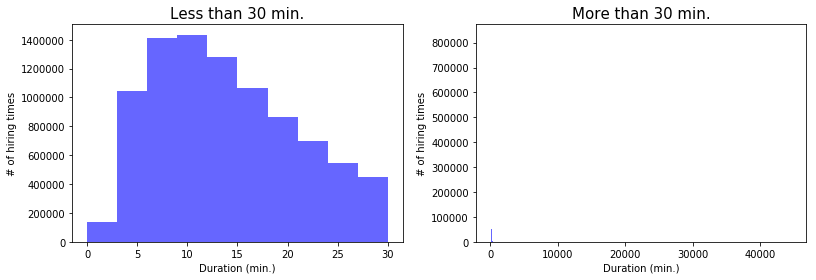

In [50]:
# Creat a figure 
figure=plt.figure(figsize=(17,4))

# Add first plot
ax1 = figure.add_subplot(131)
plt.hist(less_30, facecolor='b',alpha=0.6)
ax1.set_title("Less than 30 min.", fontsize=15)
plt.xlabel('Duration (min.)')
plt.ylabel('# of hiring times')

# Add second plot
ax2 = figure.add_subplot(132)
plt.hist(more_30, bins = 1000, facecolor='b',alpha=0.6)
ax2.set_title("More than 30 min.", fontsize=15)
plt.xlabel('Duration (min.)')
plt.ylabel('# of hiring times')

plt.tight_layout()

Compared with two graphs, the group of more than 30 minutes duration takes variety of duration time, although almost all of rental in this group (more than eight hundred thousands) seem less than 100 min. Since the very tiny number of rental dudation is more than 100 minutes, I cannot see them in the graph, but they exactly exist. 
This results convinces me that it is better to use median instead of mean when pre-procsesing the duration data by time.

### HOUR
I found that the mean value does not respresent Duration data in this dataset, so I will used the median to see if there is any relation between duration and time, or the hour. Before seeing it, I would like to compare the mean Duration and median Duration by time, which may suggest when such a little-bit-outlaw actions (rent and forget to return) would happen.

In [51]:
# Create a subset for Duration analysis
sub_duration = df[['Duration', 'Start Date', 'S_hour']]

In [52]:
duration_mean = sub_duration.groupby(['S_hour']).mean()
duration_median = sub_duration.groupby(['S_hour']).median()

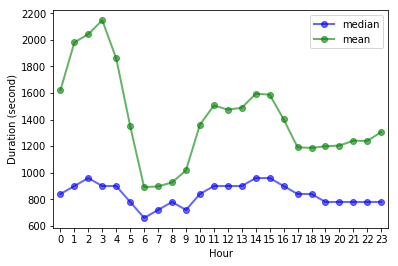

In [53]:
plt.subplot()
plot2 = plt.plot(duration_median, 'o-', linewidth=2, color = 'b', alpha=0.6, label="median")
plot1 = plt.plot(duration_mean, 'o-', linewidth=2, color = 'g', alpha=0.6, label="mean")

plt.legend(loc='best')
plt.xlim(-0.5, 23.5)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Duration (second)')
plt.show()

I can wee that there is a huge gap between the mean and the median during night from 1 to 3 am. I infer that this is because there might be more outlaw people at night, or people who were drunk used a rental bike and forgot to return. Unfortunately this assumption cannot be proved by this dataset, but furthur analysis　about long duration rental behvaiour would be useful for Transportation for London to manage the bike rental system. 

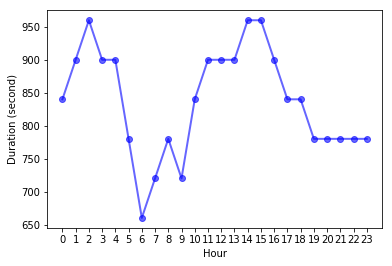

In [54]:
plt.plot(duration_median, 'o-', linewidth=2, color = 'b', alpha=0.6)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Duration (second)')
plt.show()

This graph show the median duration time by hour. It is observed that duration is relatively shorter in commuting time, while it is longer in past-mid night and daytime. I can assume that people who hired a bike during daytime might use it for the purpose of leasure rather than a transportation measure.

### HOUR $\times$ DAY
I will inspect the difference of duration by weekday and weekend.

In [55]:
sub_duration.index = sub_duration['Start Date']

In [56]:
Median_duration = pd.DataFrame(sub_duration['Duration'].resample('60T').median())
Median_duration['S_hour'] = pd.DatetimeIndex(Median_duration.index).hour

In [57]:
Median_duration

,Duration,S_hour
Start Date,,
2016-01-10 00:00:00,750.0000,0
2016-01-10 01:00:00,870.0000,1
2016-01-10 02:00:00,900.0000,2
2016-01-10 03:00:00,750.0000,3
2016-01-10 04:00:00,840.0000,4
2016-01-10 05:00:00,720.0000,5
2016-01-10 06:00:00,780.0000,6
2016-01-10 07:00:00,720.0000,7
2016-01-10 08:00:00,660.0000,8


In [58]:
day = []
for i in range(len(Median_duration)):
    temp_day = Median_duration.index[i].weekday()
    day.append(temp_day)
Median_duration['day'] = day

In [59]:
# Creat dataset for weekend and weekday
weekend_duration = Median_duration[(Median_duration.day ==5) | (Median_duration.day == 6)]
weekday_duration = Median_duration[(Median_duration.day !=5) & (Median_duration.day != 6)]

In [60]:
d_weekend = weekend_duration.groupby('S_hour').mean()
d_weekday = weekday_duration.groupby('S_hour').mean()
d_whole = Median_duration.groupby('S_hour').mean()

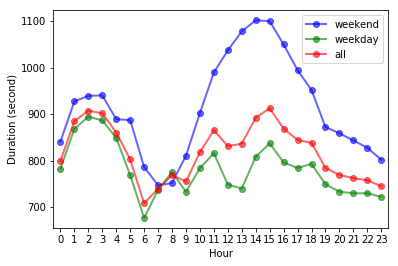

In [61]:
plt.subplot()
plot1 = plt.plot(d_weekend['Duration'], 'o-', linewidth=2, color = 'b', alpha=0.6, label="weekend")
plot2 = plt.plot(d_weekday['Duration'], 'o-', linewidth=2, color = 'g', alpha=0.6, label="weekday")
plot3 = plt.plot(d_whole['Duration'], 'o-', linewidth=2, color = 'r', alpha=0.6, label="all")

plt.legend(loc='best')
plt.xlim(-0.5, 23.5)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Duration (second)')
plt.show()

The graph shows the comparison of duration by second between weekend, weekday, and whole. The duration value refers to an average duration, specifically, the average of median of each one hour of a day. The big difference of rental behaviour between weekend and weekday is duration per a journey in daytime. A duration from 14 to 15 in weekend takes 1100 second, namely 18 minutes on average. Also in general, rental cyclists tend to ride a bicycle longer weekend through a day. 

### DAY

In [62]:
duration_day = Median_duration.groupby('day').mean()

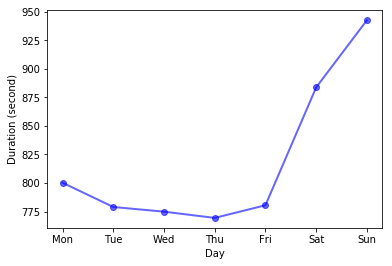

In [63]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.plot(duration_day['Duration'], 'o-', linewidth=2, color = 'b', alpha=0.6)
#plt.xlim(-0.5, 6.5)
plt.xticks(range(7), days)
plt.xlabel('Day')
plt.ylabel('Duration (second)')
plt.show()

As observed before, duration in weekend is much longer than that in weekdays.

### YEAR

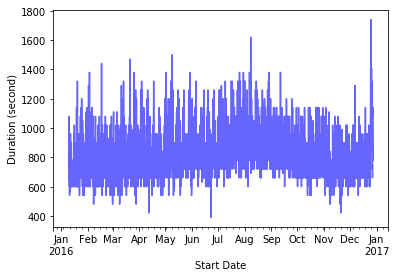

In [64]:
Median_duration['Duration'].plot(color = 'b', alpha=0.6)
plt.ylabel('Duration (second)');

Overall the duration are almost same, but I can see that duration became shorter in winter as it is because people do not want to go outside. The interesting point is that longest duration is in the end of December. This might be related to the winter vacation.

## (3) Which docking station is the most popular?

This section will visualize the location of bike stations on a london map by its popularity. The aim of this section is to find the tendency or features of the popular destination accessed by the rental bicycles, as well as the starting point. After examining simple properties for end station data, I will download the geospatial data including latitude and longitude for each docking station (https://api.tfl.gov.uk/bikepoint).

### DATA EXPLORATION for END STATION

In [65]:
# Top 10 common End station
destination = pd.DataFrame(df['EndStation Name'].value_counts())
destination.columns = ['count']
destination.head(10)

,count
"Belgrove Street , King's Cross",96013
"Hyde Park Corner, Hyde Park",79334
"Waterloo Station 3, Waterloo",78321
"Hop Exchange, The Borough",65024
"Albert Gate, Hyde Park",63705
"Black Lion Gate, Kensington Gardens",59695
"Waterloo Station 1, Waterloo",55759
"Wormwood Street, Liverpool Street",51683
"Holborn Circus, Holborn",49625
"Brushfield Street, Liverpool Street",49480


From the above, I can see two patterns of the popular end station. First, it locates to near the main station that have both underground and railway train (King's corss, Waterloo, Liverpool Street). Scondly, it is close to the park or garden (Hyde Park, Kensington Gardens).

In [66]:
destination.describe()

,count
count,805.0000
mean,"12,453.1528"
std,"10,097.7190"
min,3.0000
25%,"6,426.0000"
50%,"10,270.0000"
75%,"15,170.0000"
max,"96,013.0000"


There are 805 stations used to return bycicles in London in 2016. While the dokcing station called Belgrove Street , King's Cross were used 96013 times, there is a station where bicycle are use only three times.

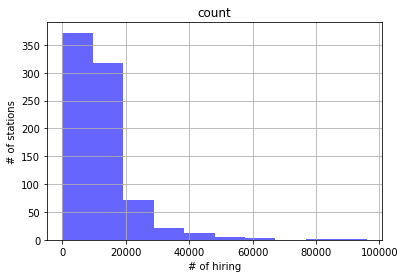

In [67]:
destination.hist(color = 'b', alpha=0.6);
plt.xlabel('# of hiring')
plt.ylabel('# of stations')
plt.show()

Most end docking stations were used less than twenty thousand tiems, and small number of stations were heavily used (more than ). This may follow the power-law distribution. 

### GEOSPATIAL DATA

In [68]:
from pandas.io.json import json_normalize

In [69]:
# Station list - get geospatial data for docking station
query = 'https://api.tfl.gov.uk/bikepoint'

In [70]:
r = requests.get(query).json()
bikepoint= json_normalize(r)
#bikepoint.head()

In [71]:
print("Number of station: ", len(bikepoint))

Number of station:  782


In [72]:
# Create a dataframe to refer to latitude and longitude
station = bikepoint[["commonName", "lat", "lon"]]
station.index = list(station.commonName)
station = station.drop('commonName', axis=1)

In [73]:
station

,lat,lon
"River Street , Clerkenwell",51.5292,-0.1100
"Phillimore Gardens, Kensington",51.4996,-0.1976
"Christopher Street, Liverpool Street",51.5213,-0.0846
"St. Chad's Street, King's Cross",51.5301,-0.1210
"Sedding Street, Sloane Square",51.4931,-0.1569
"Broadcasting House, Marylebone",51.5181,-0.1442
"Charlbert Street, St. John's Wood",51.5343,-0.1681
"Maida Vale, Maida Vale",51.5299,-0.1835
"New Globe Walk, Bankside",51.5074,-0.0964
"Park Street, Bankside",51.5060,-0.0928


### PREPARATION of CYCLING DATA
I will create a dataframe of End station includining latitude and longitude.

In [74]:
# Conbine End station data and geospatial data to link the station name and longitude & latitude.
for_map = destination.join(station, how='right')
for_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, River Street , Clerkenwell to Sea Containers, South Bank
Data columns (total 3 columns):
count    746 non-null float64
lat      782 non-null float64
lon      782 non-null float64
dtypes: float64(3)
memory usage: 44.4+ KB


In [75]:
# Check the number of null data in each columns
for_map.isnull().sum()

count    36
lat       0
lon       0
dtype: int64

There are four stations that are not included in End station columns in the cycling data in 2016. This is quite normal since I can assume that there was no one who returned bicycles in these four stations, or these stations were settled in recent days.

In [76]:
# Stations that do not exist in cycling data in 2016
nan_station = for_map[for_map['count'].isnull() == True]
nan_station

,count,lat,lon
"Maida Vale, Maida Vale",nan,51.5299,-0.1835
"Pindar Street, Liverpool Street",nan,51.5210,-0.0835
"Arundel Street, Temple",nan,51.5117,-0.1139
"Worship Street, Shoreditch",nan,51.5217,-0.0796
"Queensway, Paddington",nan,51.5103,-0.1874
"Kingsway, Covent Garden",nan,51.5144,-0.1185
"St Mary's Hospital, Paddington",nan,51.5183,-0.1711
"Rathbone Street, Fitzrovia",nan,51.5182,-0.1350
"Wells Street, Fitzrovia",nan,51.5173,-0.1381
"Warwick Row, Westminster",nan,51.4980,-0.1430


In [77]:
# Fill 0 into count columns in for_map dataset.
for_map = for_map.fillna(0)

### MAPPING - END STATION
I will use the python library called Folium in order to depict a beautiful map. Folium is installed by typing "pip3 install folium" in terminal or command. Also it is installed from anaconda. The detailed information about Folium can be founded in the following link.
* https://pypi.python.org/pypi/folium
* https://github.com/python-visualization/folium  

I will plot the end station on the map as a circle which denotes the number of hiring.

In [78]:
import folium

In [79]:
for_map.head()

,count,lat,lon
"River Street , Clerkenwell","5,974.0000",51.5292,-0.1100
"Phillimore Gardens, Kensington","15,223.0000",51.4996,-0.1976
"Christopher Street, Liverpool Street","15,259.0000",51.5213,-0.0846
"St. Chad's Street, King's Cross","12,928.0000",51.5301,-0.1210
"Sedding Street, Sloane Square","20,258.0000",51.4931,-0.1569


In [80]:
for_map.describe()

,count,lat,lon
count,782.0000,782.0000,782.0000
mean,"12,153.0754",51.5060,-0.1286
std,"10,217.5683",0.0202,0.0546
min,0.0000,51.4548,-0.2368
25%,"6,199.2500",51.4931,-0.1720
50%,"10,126.5000",51.5093,-0.1298
75%,"14,992.5000",51.5210,-0.0931
max,"96,013.0000",51.5494,-0.0023


The dataset for mapping the stations contains 778 stations.  
Finally I will plot the locations in a map. It takes several seconds to complete the following code.

In [81]:
#m = folium.Map(location=[51.509, -0.119], zoom_start=12.3, tiles='Stamen Watercolor')
#m = folium.Map(location=[51.509, -0.119], zoom_start=12.3, tiles='Stamen Terrain')
#m = folium.Map(location=[51.509, -0.119], zoom_start=12.3, tiles= 'Stamen Toner')
m = folium.Map(location=[51.509, -0.119], zoom_start=12.3)
for i in range(len(for_map)):
    folium.CircleMarker(location=[for_map['lat'][i], for_map['lon'][i]], radius=for_map['count'][i]/4000,
                    popup=for_map.index[i], color='#3186cc',
                    fill_color='#3186cc', fill_opacity=0.5).add_to(m)

In [82]:
m

In [ ]:
m.save("map_end_station.html")

From the map, I can see that the more the station locates in central london, the more the number of hiring is larger.

### MAPPING - START STATION

In [98]:
start = pd.DataFrame(df['StartStation Name'].value_counts())

In [99]:
start.head()

,StartStation Name
"Belgrove Street , King's Cross",97386
"Waterloo Station 3, Waterloo",80501
"Hyde Park Corner, Hyde Park",79183
"Albert Gate, Hyde Park",62531
"Black Lion Gate, Kensington Gardens",62177


From avove, I can see that start station that most used is almost same as the end station.

In [100]:
for_start_map = destination.join(station, how='right')
for_start_map = for_start_map.fillna(0)
#for_start_map.head()

In [101]:
m = folium.Map(location=[51.509, -0.119], zoom_start=12.3)
for i in range(len(for_start_map)):
    folium.CircleMarker(location=[for_start_map['lat'][i], for_start_map['lon'][i]], radius=for_start_map['count'][i]/4000,
                    popup=for_start_map.index[i], color='#DF5463',
                    fill_color='#DF5463', fill_opacity=0.5).add_to(m)

In [102]:
m

In [103]:
m.save("map_start_start.html")

This map is quite similar to the end station mapping, which does not give me informative findings. However, I could confirm that the popular start stations and end stations are same.

## (4) Which routs are used most?
Finally the common routes between two docking locations will be visualised. The curiostiy is whether there are any particular destination from one location.  
I will focus on two most used docking stations: [Belgrove Street , King's Cross], and [Hyde Park Corner, Hyde Park], and depict the line to the most common 500 routs (directions) from these two docking locations.

In [88]:
# Create a dataset for route analysis
route = df[['Start Date', 'StartStation Name', 'EndStation Name', 'S_hour']]

In [89]:
# Reshape the dataset by route
bike_paths = route.groupby(['StartStation Name', 'EndStation Name']).count().reset_index()
bike_paths = (bike_paths.rename(columns={'Start Date': 'count'})).drop('S_hour', axis=1)
#bike_paths

In [90]:
# Create a new column and put the latitude and longitude value 
bike_paths['start_lat'] = bike_paths['StartStation Name'].map(station['lat'])
bike_paths['start_lon'] = bike_paths['StartStation Name'].map(station['lon'])
bike_paths['end_lat'] = bike_paths['EndStation Name'].map(station['lat'])
bike_paths['end_lon'] = bike_paths['EndStation Name'].map(station['lon'])

In [107]:
bike_paths.head(10)

,StartStation Name,EndStation Name,count,start_lat,start_lon,end_lat,end_lon
0,"Abbey Orchard Street, Westminster","Abbey Orchard Street, Westminster",204,nan,nan,nan,nan
1,"Abbey Orchard Street, Westminster","Aberdeen Place, St. John's Wood",4,nan,nan,51.5248,-0.1763
2,"Abbey Orchard Street, Westminster","Abingdon Green, Westminster",62,nan,nan,51.4976,-0.1260
3,"Abbey Orchard Street, Westminster","Abingdon Villas, Kensington",2,nan,nan,51.4974,-0.1972
4,"Abbey Orchard Street, Westminster","Abyssinia Close, Clapham Junction",5,nan,nan,51.4603,-0.1670
5,"Abbey Orchard Street, Westminster","Ada Street, Hackney Central",2,nan,nan,51.5357,-0.0603
6,"Abbey Orchard Street, Westminster","Addison Road, Holland Park",1,nan,nan,51.5042,-0.2109
7,"Abbey Orchard Street, Westminster","Aintree Street, Fulham",1,nan,nan,51.4810,-0.2100
8,"Abbey Orchard Street, Westminster","Albany Street, The Regent's Park",2,nan,nan,51.5283,-0.1445
9,"Abbey Orchard Street, Westminster","Albert Bridge Road, Battersea Park",46,nan,nan,51.4744,-0.1633


### RANKING
The most commmon combination of start station and end station will be shown.

In [104]:
bike_paths.sort_values(by='count', ascending=False).head(10)

,StartStation Name,EndStation Name,count,start_lat,start_lon,end_lat,end_lon
175663,"Hyde Park Corner, Hyde Park","Hyde Park Corner, Hyde Park",21612,51.5031,-0.1535,51.5031,-0.1535
13278,"Aquatic Centre, Queen Elizabeth Olympic Park","Aquatic Centre, Queen Elizabeth Olympic Park",16766,51.5409,-0.0105,51.5409,-0.0105
6411,"Albert Gate, Hyde Park","Albert Gate, Hyde Park",13414,51.5030,-0.1585,51.5030,-0.1585
36874,"Black Lion Gate, Kensington Gardens","Black Lion Gate, Kensington Gardens",12794,51.5099,-0.1878,51.5099,-0.1878
341224,"Triangle Car Park, Hyde Park","Triangle Car Park, Hyde Park",9309,51.5065,-0.1703,51.5065,-0.1703
256273,"Podium, Queen Elizabeth Olympic Park","Podium, Queen Elizabeth Olympic Park",7104,51.5387,-0.0119,51.5387,-0.0119
309424,"Speakers' Corner 1, Hyde Park","Speakers' Corner 1, Hyde Park",5929,nan,nan,nan,nan
244803,"Palace Gate, Kensington Gardens","Palace Gate, Kensington Gardens",5577,51.5020,-0.1844,51.5020,-0.1844
247675,"Park Lane , Hyde Park","Park Lane , Hyde Park",5547,51.5100,-0.1573,51.5100,-0.1573
309991,"Speakers' Corner 2, Hyde Park","Speakers' Corner 2, Hyde Park",5526,nan,nan,nan,nan


Since users rent and returned a bike in the same station in the ranking, the rental bicycles are probably used within or around a park or garden in most cases. From the previous analysis, I thought that the main users are commuters, yet I could see that a bunch of rental bicycles are used for leasure as well.  

Now, one different question is provoked. The docking stations which is not related to park also ranks the top level. As shown below, "Belgrove Street , King's Cross", "Waterloo Station 3, Waterloo" are the most used docking stations that does not related to park or garden. (By the way, this is arguably because of the train station close to them.) My question here is whether these docking stations are also functionized like a docking station near park or gardens, namely most of which the start point and end point are same. This will be investigated in the following.

In [93]:
# Most used docking station
destination.head(5)

,count
"Belgrove Street , King's Cross",96013
"Hyde Park Corner, Hyde Park",79334
"Waterloo Station 3, Waterloo",78321
"Hop Exchange, The Borough",65024
"Albert Gate, Hyde Park",63705


### PRE-PROCESSING for ROUTE MAPPING

In [105]:
# Create datasets that contain for each docking station
paths_kings = bike_paths[bike_paths['StartStation Name'] == "Belgrove Street , King\'s Cross" ]
#kings_p = paths_kings.sort_values(by='count', ascending=False)

paths_hydepark = bike_paths[bike_paths['StartStation Name'] == "Hyde Park Corner, Hyde Park" ]
#hydepark_p = paths_hydepark.sort_values(by='count', ascending=False)

In [106]:
paths_kings

,StartStation Name,EndStation Name,count,start_lat,start_lon,end_lat,end_lon
27904,"Belgrove Street , King's Cross","Abbey Orchard Street, Westminster",972,51.5299,-0.1236,nan,nan
27905,"Belgrove Street , King's Cross","Aberdeen Place, St. John's Wood",18,51.5299,-0.1236,51.5248,-0.1763
27906,"Belgrove Street , King's Cross","Aberfeldy Street, Poplar",2,51.5299,-0.1236,51.5135,-0.0057
27907,"Belgrove Street , King's Cross","Abingdon Green, Westminster",340,51.5299,-0.1236,51.4976,-0.1260
27908,"Belgrove Street , King's Cross","Abingdon Villas, Kensington",4,51.5299,-0.1236,51.4974,-0.1972
27909,"Belgrove Street , King's Cross","Abyssinia Close, Clapham Junction",1,51.5299,-0.1236,51.4603,-0.1670
27910,"Belgrove Street , King's Cross","Ada Street, Hackney Central",81,51.5299,-0.1236,51.5357,-0.0603
27911,"Belgrove Street , King's Cross","Addison Road, Holland Park",1,51.5299,-0.1236,51.5042,-0.2109
27912,"Belgrove Street , King's Cross","Aintree Street, Fulham",3,51.5299,-0.1236,51.4810,-0.2100
27913,"Belgrove Street , King's Cross","Albany Street, The Regent's Park",136,51.5299,-0.1236,51.5283,-0.1445


In [95]:
# Combine latitude and longitude in the station dataset for mapping route
for j in [paths_kings, paths_hydepark]:    
    start_co = []
    end_co = []
    stations = []
    for key, row in j[['start_lat', 'start_lon']].iterrows():
        start_co.append(list(row))
    for key, row in j[['end_lat', 'end_lon']].iterrows():
        end_co.append(list(row))
    for key, row in j[['StartStation Name', 'EndStation Name']].iterrows():
        stations.append(list(row))
    j['start_co'] = start_co
    j['end_co'] = end_co
    j['stations'] = stations

In [96]:
# Mapping route from Belgrove Street , King's Cross
count_list = list(paths_kings['count'])
coordinate_list = []
for key, row in paths_kings[['start_co', 'end_co']].iterrows():
    coordinate_list.append(list(row))
    
mapWidth, mapHeight = (400,500)  
my_map = folium.Map(location=[51.518, -0.121], zoom_start=13.2, tiles = 'cartodbpositron')
for (i, w) in zip(coordinate_list, count_list):
    for j in i:
            folium.CircleMarker(location = j, radius=w/100, color='#3186cc', fill_color='#3186cc', fill_opacity=0.5).add_to(my_map)
    folium.PolyLine(i, color="blue", weight= w/200, opacity=1).add_to(my_map);

ValueError: Location values cannot contain NaNs.

In [ ]:
my_map

In [ ]:
# Mapping route from Hyde Park Corner, Hyde Park
count_list = list(paths_hydepark['count'])
coordinate_list = []
for key, row in paths_hydepark[['start_co', 'end_co']].iterrows():
    coordinate_list.append(list(row))
    
mapWidth, mapHeight = (400,500)  
my_map = folium.Map(location=[51.518, -0.121], zoom_start=13.2, tiles = 'cartodbpositron')
for (i, w) in zip(coordinate_list, count_list):
    for j in i:
            folium.CircleMarker(location = j, radius=w/100, color='#3186cc', fill_color='#3186cc', fill_opacity=0.5).add_to(my_map)
    folium.PolyLine(i, color="blue", weight= w/200, opacity=1).add_to(my_map);

In [ ]:
my_map

In the route maps above, the cercle size refers to the number of hiring, and the width of the line denotes the the number of jouney. Compared these pictures in [Belgrove Street , King\'s Cross] and [Hyde Park Corner, Hyde Park], I can clearly see that rental cyclists from King's docking station are heading to more various destinations than those hired in Hyde Park docking. The main characteristic of King's parking lot is that there are two major destinations, British Museum and Abby Orchard street near VIctoria subway station. As for Hyde Park, their main destinations are the different docking station inside of the hydepark, which suggests that bicycles in Hyde Park station are mostly used for enjoying cicling in the park. As such, the rental bicycles are differently used in the docking stations in near train stations, and the docking stations in near parks. 

# 3. Limitation and Suggestion

Although this report has aimed to grasp the main feature in London rental cycling campaign, I could not completely deepen the analysis because of the wide scope, which caused lack of time. If I had have more time, I would have tired PCA to convince that there are two types of bike docking stations, station-close and park-close docking, and also would conducted random forest to see the feature importance, specifically to compare which features (time, day, season, duration) are more important.

I would like to suggest that Transport for London may prepare two types of biycles, for short journey in the park, and  long journey. Although I did not analyse the distance in this analysis, I can see from the map that there are several long journeies existed. The further analysis needed more, but this can be one of the idea that would be derived from this analysis.

# 4. Conclusions

This report has explored the London rental cycling data (10,024,788 journey) in 2016, and revealed the following points.

1) The number of rental is correlated with time (the hour), day and season. The most used time is commuting time, namely 8 to 10, 16 to 18 in weekday, and daytime in weekend. In case of seasonality, the number of rental cycling is slightly larger in summer.

2) The duration of renting bicycles is smaller in commuting time, and larger in past-midnight in weekday and the daytime in weekend. There duration does not largely change by season, but it became shorter in winter.

3) The popular docking stations are located close to have a major train or subway station near or Park. These bike parking spots are also characterized by the destination commonly accessed. In case of station-close docking spot, rental users head to various destination, while rental cyclists from park-close docking spot tend to use it within or around the park or garden. As such, rental bicycles in London are used for two main reasons, commuting and leisures.


# References

* https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/
* https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/
* https://www.london.gov.uk/sites/default/files/cycling-revolution-london.pdf